# Jacob's swan notebook

## Set up

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler


In [66]:
df = pd.read_csv('Project_Data.csv')
pd.set_option("display.max_columns", None)

## Feature engineering

In [67]:
# Feature engineering function, maps binary columns to integers (0 and 1)
def feature_engineering(df):
    df_local = df.copy()

    # Convert gender to numeric
    df_local['Gender'] = df_local['Gender'].map({'Male': 0, 'Female': 1})

    # Binary yes/no features
    fe_list = ['Senior Citizen', 'Partner', 'Dependents',
               'Phone Service', 'Paperless Billing']
    for feature in fe_list:
        if feature in df_local.columns:
            df_local[feature] = df_local[feature].map({'No': 0, 'Yes': 1})

    # Internet-related categorical features (one-hot encode)
    internet_list = [
        'Online Security', 'Online Backup', 'Device Protection',
        'Tech Support', 'Streaming TV', 'Streaming Movies'
    ]
    df_local = pd.get_dummies(
        data=df_local,
        columns=internet_list,
        drop_first=True,
        dtype='int'
    )

    # Multiple Lines mapping
    if 'Multiple Lines' in df_local.columns:
        df_local['Multiple Lines'] = df_local['Multiple Lines'].map({
            'No': 0,
            'Yes': 1,
            'No phone service': 0
        })

    return df_local


## Logistic Regression Model

In [68]:
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Churn Label': 'churn_flag',
    'Churn Value': 'churn_value',
    'Churn Reason': 'churn_reason',
    'Tenure Months': 'tenure_months',
    'Monthly Charges': 'monthly_charges',
    'Total Charges': 'total_charges'
})

In [69]:

# Select features for modeling
features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure_months',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
    'monthly_charges', 'total_charges'
]

In [70]:
# Feature engineering function, maps binary columns to integers (0 and 1)
def feature_engineering(df):
    df_local = df.copy()

    # Convert gender to numeric
    df_local['Gender'] = df_local['Gender'].map({'Male': 0, 'Female': 1})

    # Binary yes/no features
    fe_list = ['Senior Citizen', 'Partner', 'Dependents',
               'Phone Service', 'Paperless Billing']
    for feature in fe_list:
        if feature in df_local.columns:
            df_local[feature] = df_local[feature].map({'No': 0, 'Yes': 1})

    # Internet-related categorical features (one-hot encode)
    internet_list = [
        'Online Security', 'Online Backup', 'Device Protection',
        'Tech Support', 'Streaming TV', 'Streaming Movies', 'Internet Service',
        'Contract', 'Payment Method'
    ]
    df_local = pd.get_dummies(
        data=df_local,
        columns=internet_list,
        drop_first=True,
        dtype='int'
    )

    # Multiple Lines mapping
    if 'Multiple Lines' in df_local.columns:
        df_local['Multiple Lines'] = df_local['Multiple Lines'].map({
            'No': 0,
            'Yes': 1,
            'No phone service': 0
        })

    return df_local


In [71]:
X = df[features].copy()
y = df['churn_value']

In [72]:
# Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

In [75]:
display(X_train_fe.head())

,Gender,Senior Citizen,Partner,Dependents,tenure_months,Phone Service,Multiple Lines,Paperless Billing,monthly_charges,total_charges,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,0,0,1,0,71,1,1,1,98.65,6962.85,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
1623,1,0,0,0,16,1,0,1,93.20,1573.7,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
6074,1,0,0,0,32,1,1,1,104.05,3416.85,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
1362,1,1,1,0,24,0,0,1,40.65,933.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
6754,1,0,1,1,20,1,0,0,20.05,406.05,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [87]:
### Fill missing values
median = X_train_fe.loc[~(X_train_fe['total_charges'] == ' ')]['total_charges'].astype('float').median()
print(f'The median value of total charges is {median}')
X_train_fe['total_charges'] = X_train_fe['total_charges'].replace({' ': median})
X_test_fe['total_charges'] = X_test_fe['total_charges'].replace({' ': median})

The median value of total charges is 1388.0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

array([[ 1.0161041 , -0.44091181, -0.97718598, ..., -0.52683111,
        -0.70259329, -0.55069195],
       [-0.98415114, -0.44091181,  1.02334665, ...,  1.89814151,
        -0.70259329, -0.55069195],
       [ 1.0161041 , -0.44091181, -0.97718598, ..., -0.52683111,
        -0.70259329,  1.81589725],
       ...,
       [ 1.0161041 , -0.44091181,  1.02334665, ..., -0.52683111,
         1.42329854, -0.55069195],
       [-0.98415114, -0.44091181,  1.02334665, ..., -0.52683111,
         1.42329854, -0.55069195],
       [ 1.0161041 ,  2.26802726, -0.97718598, ..., -0.52683111,
         1.42329854, -0.55069195]], shape=(1409, 29))

In [94]:
log_reg = LogisticRegression(
    random_state=42,
    class_weight= 'balanced',
    max_iter = 1000,
    C=1.0
)

log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [95]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

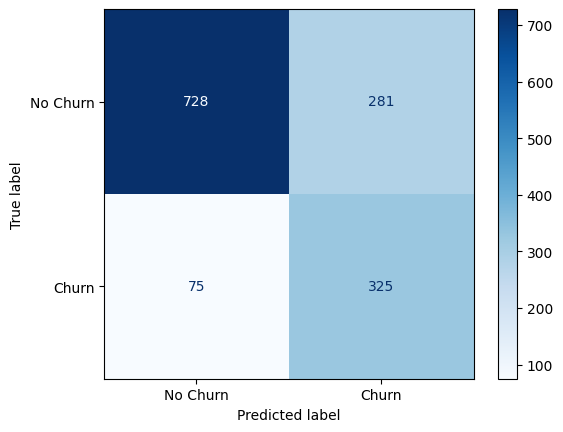

In [101]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Churn', 'Churn'],
                              )
disp.plot(cmap='Blues')
plt.show()

In [104]:
## There are 4 main metrics we're interested in at this stage: 
#accuracy, precision, recall and F1.
## The 'metrics' module from sklearn covers all of them (and more!) 
#So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {recall_score(actual, predicted)}')
    print(f'The precision of your model is: {precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {f1_score(actual, predicted)}')

In [105]:
get_results(y_test, y_pred)

The confusion matrix for your predictions is:
[[728 281]
 [ 75 325]] 

The accuracy of your model is: 0.7473385379701917
The recall of your model is: 0.8125
The precision of your model is: 0.5363036303630363
The F1-score of your model is: 0.6461232604373758
